# Train set et Test set
Jamais évaluer les perfs d'un modèle sur les données d'entrainement

Couper le dataset en 2 : 
1. Train set 80% - Utilisé dans model.fit
1. Test set 20% - Utilisé dans model.score

Utiliser la fonction model_selection.train_test_split() 

Note :
1. dataset
1. Modèle et ses paramètres
1. Entrainement (minimiser la fonction coût)
1. Prédictions


## 1 - dataset

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)


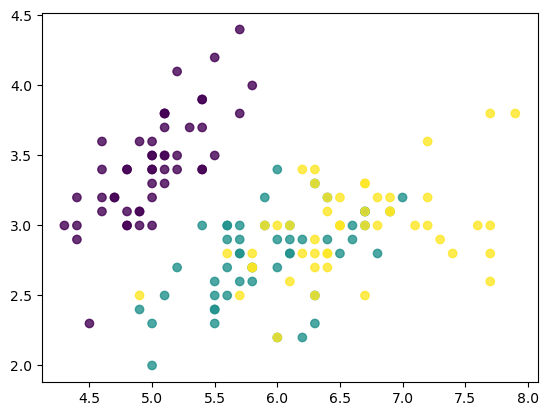

In [56]:
iris = load_iris()

X = iris.data
y = iris.target

print(type(X))
print(X.shape)
# print(X) # une matrice 150x4 avec les valeurs long petal etc.
print(type(y))
print(y.shape) # y contient les 3 type d'iris (0, 1 ou 2)
# print(y)
_ = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

### Division du dataset
Voir : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# random_state permet d'avoir toujours les 2 mêmes jeux
# test_size permet de faire 80-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)
print(f"Train set : {X_train.shape} et {y_train.shape}")
print(f"Test set : {X_test.shape} et {y_test.shape}")


# Note à propose de train_test_split
# On peut utiliser "stratify=y" 
# Allows you to stratify your sample. 
# Meaning, you will have the same proportion of categories in test and train set

Train set : (120, 4) et (120,)
Test set : (30, 4) et (30,)


Text(0.5, 1.0, 'Test set')

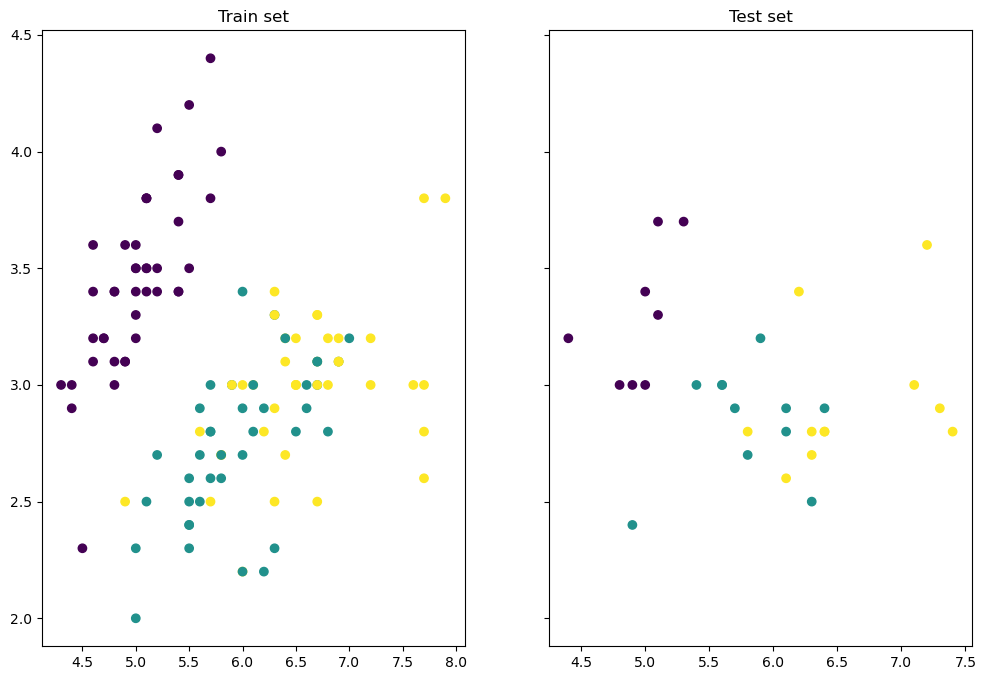

In [59]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_size_inches((12, 8))
axs[0].scatter(X_train[:,0], X_train[:,1], c=y_train)
axs[0].set_title("Train set")
axs[1].scatter(X_test[:,0], X_test[:,1], c=y_test)
axs[1].set_title("Test set")

## 2 - Modèle et ses paramètres
On met 1 voisin pour l'instant...

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

## 3 - Entrainement (minimiser la fonction coût)

In [61]:
model.fit(X_train, y_train)

# On évalue le modèle sur les données d'entrainement
print(f"Train score : {model.score(X_train, y_train)}")

# On évalue le modèle sur les données de test
print(f"Test score  : {model.score(X_test, y_test)}")

Train score : 1.0
Test score  : 0.9


## 4 - Prédictions

# Améliorer le modèle avec un Validation set

90% c'est bien mais faut jouer sur les hyperparamètres du modèle pour voir si on peut pas aller plus loin

In [62]:
# 2 - Model
# On peut essayer différentes valeur pour n_neighbors
# model = KNeighborsClassifier(n_neighbors = 1)
# model = KNeighborsClassifier(n_neighbors = 3)
model = KNeighborsClassifier(n_neighbors = 6)

# 3 - Entrainement
model.fit(X_train, y_train)
print(f"Train score : {model.score(X_train, y_train)}")
print(f"Test score : {model.score(X_test, y_test)}")

Train score : 0.9833333333333333
Test score : 0.9666666666666667


**Mais attention** si on règle le modèle sur les données du Test set on pourra plus utiliser le Test set pour fair l'évaluation finale du modèle.

On crée un 3eme set. Le **Validation set**. Nous permet de trouver les réglages qui donnent les meilleurs performances sans toucher au test set. 

![Alt text](assets/validation_set.png)

Pour comparer 2 modèles (1 et 5 voisins par exemple) on fait passer le Train set sur les 2 (on a 2 scores de 100%). On fait passer le Validation set sur les 2 modèles. On a des scores de 92 et 90% par exemple. Sur le meilleur des deux on fait passer le Test set.

![Alt text](assets/validation_set2.png)




# Cross-Validation
**Question :** Comment on sait qu'on a découpé le dataset en 3 de la bonne façon? Un autre découpage aurait pu donner des résultats différents.

**Réponse :** On fait de la Cross-Validation

Pour chacun des modèles (avec 3 ou 6 voisins par exemple) qu'on veut comparer... On va entrainer et valider le modèle sur plusieurs découpes du Train set. 

Par exemple on découpe le Train set en 5 parties:

* Split1 - Partie 1 pour validation et les 4 suivantes pour l'entrainement. 
* Split2 - Partie 2 pour validation et les 4 autres pour l'entrainement. 
* Split3 - Partie 3 pour validation et les 4 autres pour l'entrainement. 
* ...

Lors de chaque splits, on a le score du Validation set des 2 modèles. À la fin des 5 splits on fait la moyenne des scores de validation. On retient le modèle (le paramétrage du modèle) qui a la meilleure moyenne

![Alt text](assets/cross_validation.png)

Dans sklearn il y a plusieurs façon de découper. Voir les splitter class (KFold etc. dans model_selection). 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

Par défaut c'est StratifiedKFold qui est utilisée. 


In [63]:
from sklearn.model_selection import cross_val_score

Dans la fonction cross_val_score, **scoring** permet de préciser le métrique à utiliser. 

Par défaut c'est le métrique de l'estimateur (ici "accuracy")

Les différents metrics sont dans sklearn.metrics. Voir : 
https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [64]:
# cv = 5 => on veut splitter le Train set en 5 splits lors de la cross validation
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring="accuracy")

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

**Bizarre** j'ai pas les mêmes résultats que dans le tutoriel. Ici j'ai 1 comme première valeur alors qu'il a 0.96. 

On obtient 5 scores. Un par split. On en fait la moyenne

In [65]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring="accuracy").mean()

0.9833333333333334

On peut dorénavant évaluer différents paramétrages de modèles et retenir celui qui a la meilleure performance.

In [66]:
cross_val_score(KNeighborsClassifier(1), X_train, y_train, cv=5, scoring="accuracy").mean()


0.975

In [67]:
cross_val_score(KNeighborsClassifier(2), X_train, y_train, cv=5, scoring="accuracy").mean()

0.9666666666666668

Au lieu de faire varier ne nb de voisins à la main on fait une boucle for

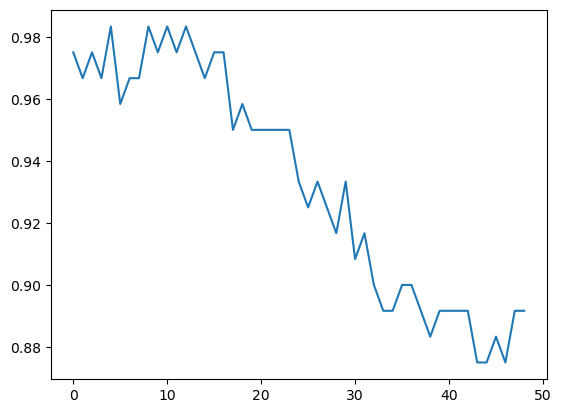

In [68]:
val_score=[]
for k in range (1, 50):
  score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5, scoring="accuracy").mean()
  val_score.append(score)
  

fig, ax = plt.subplots()  
_ = ax.plot(val_score)

Mais en fait on a pas besoin d'écrire nous même cette automatisation...

# Validation Curve (données d'entrainement)
Permet de "voir" quelles sont les valeurs d'un hyperparamètre qui optimisent au mieux le modèle.

In [69]:
from sklearn.model_selection import validation_curve

In [70]:
model = KNeighborsClassifier()

# "n_neighbors" : le nom du paramètre à optimiser
# k : la gamme du paramètre
# cv : le nombre de splits
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)
val_score.shape

# à la fin on a 49 lignes et 5 colonne car on a découpé en 5 et que k (le nb de voisins qu'on fait varier) prend 49 valeurs

(49, 5)

In [71]:
# On fait la moyenne de chaque ligne
# On récupère un tableau de 49 éléments
val_score.mean(axis=1) 

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.93333333,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

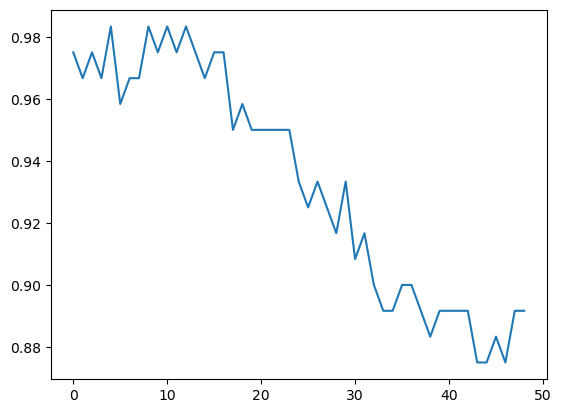

In [72]:
_ = plt.plot(val_score.mean(axis=1))


On obtient la même courbe qu'avant. Le nombre optimum de voisins est aux alentours de 10.

## Scoring Curve (données de test)
* Permet de détecter les cas d'over fitting (avec KNN peut arriver si n_neigbors est proche ou égal à 1)
* Ici on voit qu'on peut atteindre 98% avec n_neigbors autour de 10
* Autour de 10 les modèles sont très proches de la réalité. Quand n_neigbors croit le modèle est sous la réalité

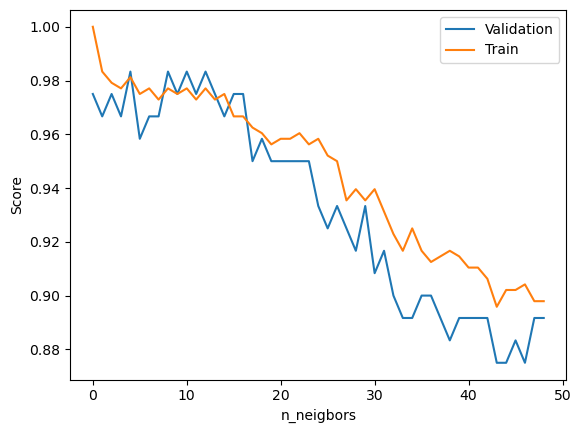

In [73]:
fig, ax = plt.subplots()  
ax.plot(val_score.mean(axis=1), label="Validation")
ax.plot(train_score.mean(axis=1), label="Train")
ax.set_ylabel('Score')
ax.set_xlabel('n_neigbors')
_ = ax.legend()

**Conclusion ** : On peut atteindre un score de 98% sin on a la bonne valeur pour n_neigbors

Cela dit, KNN il y a d'autres hyper paramètres que n_neigbors : type de distance, coef sur les distances etc.. Voir sur : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

Afin de tester tous les hyperparamètre et voir si on peut encore optimiser le score du modèle on utilise GridSearchCV

# GridSearchCV
Permet de trouver le modèle avec les hyperparamètres optimaux en comparant les performances des différentes combinaisons. Construit une grille de modèles avec toutes les combinaisons d'hyperparamètres passés en paramètres. 

![Alt text](assets/grid_search_cv.png)

In [74]:
from sklearn.model_selection import GridSearchCV

On crée un dictionnaire avec différents hyperparamètres à tester ainsi que les gammes de valeurs. 

In [75]:
param_grid = {
  "n_neighbors" : np.arange(1, 20),
  "metric" : ["euclidean", "manhattan", "minkowski"]
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# la grille contient plusieurs estimateurs
# On les entraine tous avec fit() 
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [76]:
# le meilleur score
grid.best_score_

0.9833333333333334

In [77]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [78]:
s# sauvegarder ce model
model = grid.bet_estimator_

NameError: name 's' is not defined

In [ ]:
# Test du modèle sur les données de test
model.score(X_test, y_test)

0.9333333333333333

À ce stade on peut utiliser une autre mesure pour évaluer la performance du modèle et mieux voir où se font les erreurs de classement.

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

On fait passer les vraies données y_test et les données "prédictées" 
On obtient une matrice 3x3 car on a 3 classes de fleurs dans le dataset
Lignes : vraies fleurs
Colonnes : prédictions

Les 8 fleurs de la classe 1 sont bien prédites
Pour les 11 fleurs de classe 2, 2 sont pas bien reconnues
Les 11 fleurs de la classe 3 sont toutes bien prédites

In [ ]:
arr = confusion_matrix(y_test, model.predict(X_test))
print(arr)

[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


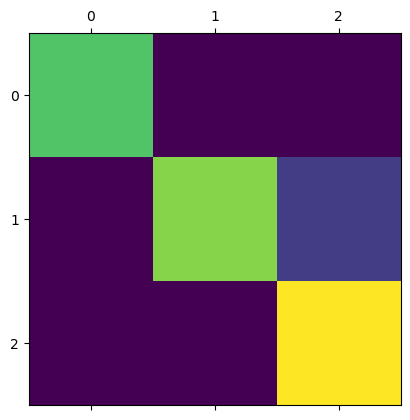

In [ ]:
_ = plt.matshow(arr)

# Les courbes d'apprentissage
Permettent de savoir si avec plus de données les prédictions seraient meilleures.

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
# train_sizes c'est les quantité de données à utiliser pour l'entrainement
# train_sizes est en %
# ici on va decouper le Train set en 5 lots qui vont aller de 20% à 100%
# donc le premier lot aura 20%, le second 40%... le dernier 100% des données
# Si le dataset a 125 points
# On en prend 25 pour la validation
# 100 pour le training
# Le premier lot aura 20 points, le second 40 etc. 
# C'est ce que l'on retrouve dans N
#N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.2, 1.0, 5))
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

print(N)


[ 9 19 28 38 48 57 67 76 86 96]


![Alt text](assets/learnig_curve.png)

In [ ]:
# juste pour montrer le contenu de train-sizes
np.linspace(0.2, 1.0, 5)


array([0.2, 0.4, 0.6, 0.8, 1. ])

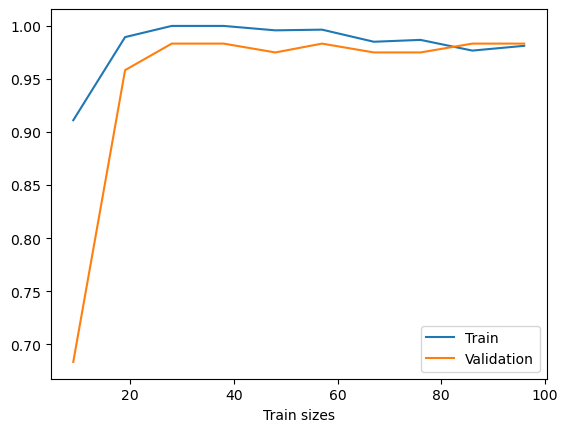

In [ ]:
fig, ax = plt.subplots()
ax.plot(N, train_score.mean(axis=1), label="Train")
ax.plot(N, val_score.mean(axis=1), label="Validation")
ax.set_xlabel("Train sizes")
_ = ax.legend()


On va dire qu'on pourra pas faire beaucoup mieux si N > 60 ou N > 80

# Recap
1. Commencer par diviser le dataset avec train_test_split()
1. Utiliser l'optimisateur GridSearchCV() pour trouver les meilleurs hyperparamètres 
    * Utilise la cross validation
    * Il faut définir un nombre de splits et la stratégie de découpage si besoin
1. Pour évaluer le modèle on peut utiliser n'importe quelle métrique (module metrics)   
1. Utiliser les courbes de validation et d'apprentissage pour vérifier si on est pas en over-fitting ou si on peut améliorer le model en utilisant plus de données  


## Exo avec les données du Titanic (20:28)
1. Créer un Train set et un Test set
1. Entrainer puis évaluer
1. Avec GridSearchCV trouver les meilleurs paramètres n_neighbors, metrics et weights
1. Est ce que collecter plus de données serait utile?

### Avec les données du Titanic

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve


In [80]:
titanic = sns.load_dataset("titanic")
print(f"Le type du tableau titanic est           : {type(titanic)}")
print(f"Les dimensions initiales du dataset sont : {titanic.shape}")
print(f"Les 1ere lignes")
print(titanic.head())
print("\n\n")

titanic = titanic[["survived", "pclass", "sex", "age"]]
titanic.dropna(axis=0, inplace=True)
titanic["sex"].replace(["male", "female"], [0,1], inplace=True)
print(type(titanic))
print(titanic.ndim)
print(titanic.shape)
titanic.head()
print("\n\n")




X = titanic[["pclass", "sex", "age"]]
#X = titanic.drop("survived", axis=1)
print(f"Le type de X est          : {type(X)}")
print(f"Le nombre de dimensions   : {X.ndim}")
print(f"Les dimensions de X sont  : {X.shape}")
print(f"Les 1ere lignes de X sont :")
print(X.head())
print("\n\n")

y = titanic["survived"]
print(f"Le type de y est          : {type(y)}")
print(f"Le nombre de dimensions   : {y.ndim}")
print(f"Les dimensions de y sont  : {y.shape}")
print(f"Les 1ere lignes de y sont :")
print(y.head())
print("\n\n")



Le type du tableau titanic est           : <class 'pandas.core.frame.DataFrame'>
Les dimensions initiales du dataset sont : (891, 15)
Les 1ere lignes
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  



<class 'pandas.core.frame.DataFrame'>
2
(714, 4)



Le type de X e

In [ ]:
# X["age"].hist()
# TO DO : fonctionne pas
# _ = plt.scatter(X[:, 2], y)
# plt.scatter(X["age"].values, y["Survived".values])

### Créer un Train set et un Test set

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)
print(f"Le type des tableaux retournés est : {type(X_train)}") 
print(f"Les dimensions du Train set sont : {X_train.shape} et {y_train.shape}")
print(f"Les dimensions du Test set sont  : {X_test.shape} et {y_test.shape}")

Le type des tableaux retournés est : <class 'pandas.core.frame.DataFrame'>
Les dimensions du Train set sont : (571, 3) et (571,)
Les dimensions du Test set sont  : (143, 3) et (143,)


In [ ]:
# TO DO : fonctionne pas

# fig, axs = plt.subplots(1, 2, sharey=True)
# fig.set_size_inches((12, 8))
# #axs[0].scatter(X_train[:,0], X_train[:,1], c=y_train)
# axs[0].scatter(X_train[:,0], X_train[:,1])
# axs[0].set_title("Train set")
# # axs[1].scatter(X_test[:,0], X_test[:,1], c=y_test)
# axs[1].scatter(X_test[:,0], X_test[:,1])
# axs[1].set_title("Test set")

In [82]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# On évalue le modèle sur les données d'entrainement
print(f"Train score : {model.score(X_train, y_train)}")

# On évalue le modèle sur les données de test
print(f"Test score  : {model.score(X_test, y_test)}")

Train score : 0.840630472854641
Test score  : 0.7202797202797203


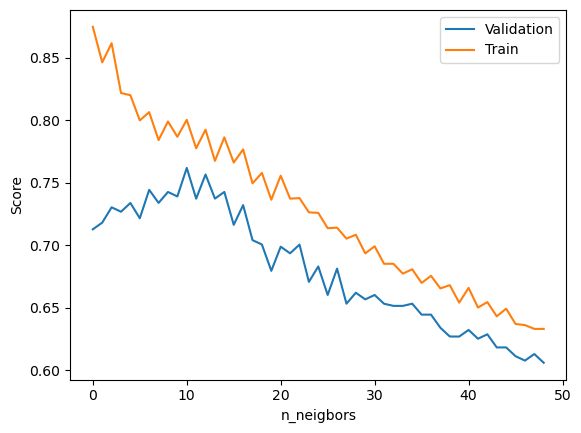

In [83]:
model = KNeighborsClassifier()

# "n_neighbors" : le nom du paramètre à optimiser
# k : la gamme du paramètre
# cv : le nombre de splits (cross validation)
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)
#val_score.shape
#val_score.mean(axis=1) 

fig, ax = plt.subplots()  
ax.plot(val_score.mean(axis=1), label="Validation")
ax.plot(train_score.mean(axis=1), label="Train")
ax.set_ylabel('Score')
ax.set_xlabel('n_neigbors')
_ = ax.legend()

In [ ]:
param_grid = {
  "n_neighbors" : np.arange(1, 20),
  "metric" : ["euclidean", "manhattan", "minkowski"]
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# la grille contient plusieurs estimateurs
# On les entraine tous avec fit() 
grid.fit(X_train, y_train)

grid.best_params_
model = grid.best_estimator_
model.score(X_test, y_test)

0.7202797202797203

In [ ]:

arr = confusion_matrix(y_test, model.predict(X_test))
print(arr)

[[72 16]
 [24 31]]


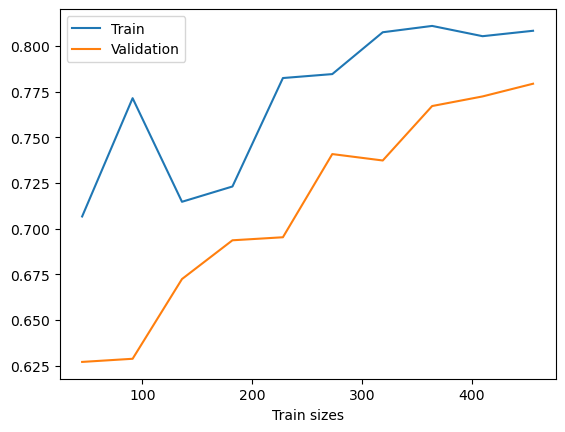

In [ ]:
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
fig, ax = plt.subplots()
ax.plot(N, train_score.mean(axis=1), label="Train")
ax.plot(N, val_score.mean(axis=1), label="Validation")
ax.set_xlabel("Train sizes")
_ = ax.legend()